## ideas for data correlation

#### done
- number of released tv shows / movies each year
    - show it on the same line graph
    - see if movies have been more popular one year, some causal factors
- do something with countries
- does the movie type suggest how many staff are employed to act
    - maybe movies have more of a budget on average, hence being able to employ more staff, does this prevail.

#### doing

    
#### require ratings from web scraping
- correlation between directors and ratings ( fins the best director )
- correlation between cast and ratings ( find who is the best cast individuals )
    - find the best director and cast combo
- find some correlations between duration and ratings ( find a distribution maybe )
    - expected a distribution to find the ideal length of file
    - if achieved this yes or no?
- analyse the title and see what appeals to people the most ( in terms of common words )
    - find peoples favourite word, does it yield words like the, or and or more fancy words?

#### additional stuff
- split movies and tv shows, find most commonly used words in the title
    - do something similar to the above, but not title


- word analysis?
- web scraping from imdb for ratings
- time series data per country onboard by netflix


## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

## load in csv file

In [8]:
df = pd.read_csv("netflix_titles_scraped.csv")

## cumulative tv shows and movies per year

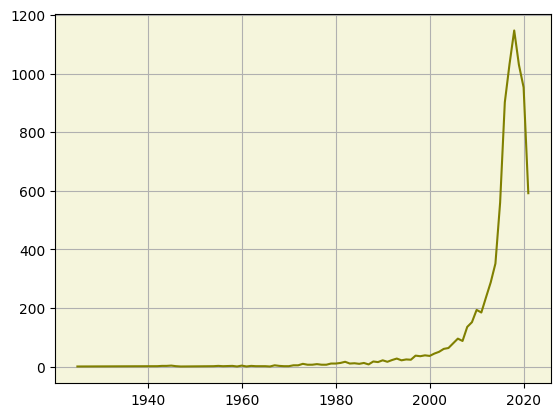

In [9]:
extract = df[["release_year"]]

release_year = {}

for year in extract.values:
    year = year[0]
    if year not in release_year:
        release_year.setdefault(year, 1)
    else:
        release_year[year] += 1


lists = sorted(release_year.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.rcParams['axes.facecolor'] = 'beige'
plt.plot(x, y, color="olive")
plt.grid()
plt.show()

## number of tv shows and movies per year

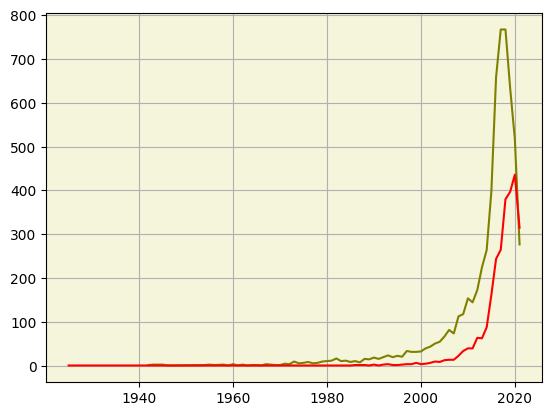

In [10]:
extract = df[["type", "release_year"]]

release_year_movie = {}
release_year_tvshow = {}

for type, year in extract.values:
    if type == "Movie":
        if year not in release_year_movie:
            release_year_movie.setdefault(year, 1)
        else:
            release_year_movie[year] += 1
    else:
        if year not in release_year_tvshow:
            release_year_tvshow.setdefault(year, 1)
        else:
            release_year_tvshow[year] += 1
    
    


movie_lists = sorted(release_year_movie.items()) # sorted by key, return a list of tuples
tvshow_lists = sorted(release_year_tvshow.items())

movie_x, movie_y = zip(*movie_lists) # unpack a list of pairs into two tuples
tvshow_x, tvshow_y = zip(*tvshow_lists)

plt.rcParams['axes.facecolor'] = 'beige'

plt.plot(movie_x, movie_y, color="olive")
plt.plot(tvshow_x, tvshow_y, color="red")

plt.grid()
plt.show()

## finding the best director

## What countries does netflix acquire the most content from

{'United States': 2818, 'South Africa': 30, 'nan': 1, 'India': 972, 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia': 1, 'United Kingdom': 419, 'Germany, Czech Republic': 2, 'Mexico': 110, 'Turkey': 105, 'Australia': 87, 'United States, India, France': 1, 'Finland': 1, 'China, Canada, United States': 3, 'South Africa, United States, Japan': 1, 'Nigeria': 95, 'Japan': 245, 'Spain, United States': 1, 'France': 124, 'Belgium': 9, 'United Kingdom, United States': 75, 'United States, United Kingdom': 47, 'France, United States': 10, 'South Korea': 199, 'Spain': 145, 'United States, Singapore': 1, 'United Kingdom, Australia, France': 1, 'United Kingdom, Australia, France, United States': 1, 'United States, Canada': 73, 'Germany, United States': 13, 'South Africa, United States': 4, 'United States, Mexico': 14, 'United States, Italy, France, Japan': 1, 'United States, Italy, Romania, United Kingdom': 1, 'Australia, United States': 13, 'Argentina, Venezuela': 1, 'United 

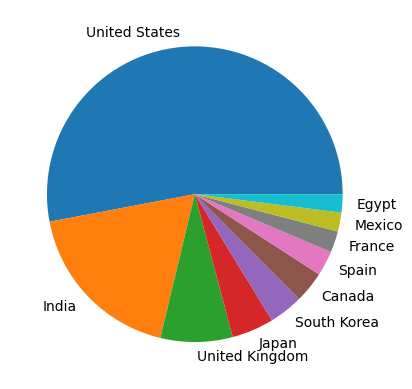

In [11]:
extract = df[["country"]]

countries = {}

for country in extract.values:

    # get the country
    country = country[0]

    # add it to the dictionary
    if country not in countries:
        countries.setdefault(str(country), 1)
    else:
        countries[country] += 1

print(countries)
# sorted by key, return a list of tuples
countries = (dict(sorted(countries.items(), key=lambda item: item[1], reverse=True)))

print(countries)
# unpack a list of pairs into two tuples
x, y = zip(*countries.items())

x = list(x)[:10]
y = list(y)[:10]

plt.rcParams['axes.facecolor'] = 'beige'
plt.pie(y, labels=x)
# plt.grid()
plt.show()

## do movies have a larger staff on average? ( suggesting larger budgets )

In [12]:
extract = df[["type", "director", "cast"]]

# keep a count of the number of tv shows and movies, and number of staff respectively
show_type = {"tvshow": 0, "movie": 0}
staff_count = {"tvshow": 0, "movie": 0}


for type, directors, cast in extract.values:
    
    # treat missing directors as 0 staff
    if pd.isnull(directors):
        count_directors = 0
    else:
        count_directors = directors.count(",") + 1

    # trat missing cast as 0 staff
    if pd.isnull(cast):
        count_cast = 0
    else:
        count_cast = cast.count(",") + 1
    
    # count the totalnumber of staff
    total = count_directors + count_cast

    # record the data
    if type == "Movie":
        show_type["movie"] += 1
        staff_count["movie"] += total
    else:
        show_type["tvshow"] += 1
        staff_count["tvshow"] += total

# print out the averages
print(f"average number of staff per tv show is {staff_count['tvshow'] / show_type['tvshow']}")
print(f"average number of staff per movie is {staff_count['movie'] / show_type['movie']}")

print(f"\nnetflix has bought {show_type['movie']} movies")
print(f"netflix has bought {show_type['tvshow']} tv shows")

average number of staff per tv show is 7.460014947683109
average number of staff per movie is 8.341379872777686

netflix has bought 6131 movies
netflix has bought 2676 tv shows


## Finding the best director

In [1]:
extract = df[["director", "audience_score", "critic_score"]]


def ln(number):
	return np.log(number + 1)

# keep a count of the number of tv shows and movies, and number of staff respectively
director_audience_score = {}
director_critic_score = {}

for director, audience_score, critic_score in extract.values:
	if pd.isnull(director):
		continue

	# split the directors
	directors = director.split(",")

	for director in directors:
		director = director.strip()
		if not pd.isnull(audience_score):
			if director not in director_audience_score:
				director_audience_score.setdefault(director, [int(audience_score)])
			else:
				director_audience_score[director].append(int(audience_score))

		if not pd.isnull(critic_score):
			if director not in director_critic_score:
				director_critic_score.setdefault(director, [int(critic_score)])
			else:
				director_critic_score[director].append(int(critic_score))

# debug
print(director_audience_score)

# one could classify a directors work by how many films made it into netflix
max_key_audience, max_value_audience = max(director_audience_score.items(), key = lambda x: len(set(x[1])))
max_key_critic, max_value_critic = max(director_critic_score.items(), key = lambda x: len(set(x[1])))
print(f"\ndirector with the most films in netflix ( that also have a audience score ) is {max_key_audience} with {len(set(max_value_audience))}")
print(f"director with the most films in netflix ( that also have a critic score ) is {max_key_critic} with {len(set(max_value_critic))}")

# one could also classify the most popular director by the highest average score of their films
max_key_audience, max_value_audience = max(director_audience_score.items(), key = lambda x: sum(x[1]) / len(x[1]))
max_key_critic, max_value_critic = max(director_critic_score.items(), key = lambda x: sum(x[1]) / len(x[1]))
print(f"\ndirectors with the highest average audience score is {max_key_audience} with {sum(max_value_audience) / len(max_value_audience)}")
print(f"directors with the highest average critic score is {max_key_critic} with {sum(max_value_critic) / len(max_value_critic)}")

# get the top 10 directors with the highest average audience score
temp_director_audience_score = {k: (sum(v) / len(v)) * ln(len(v)) for k, v in director_audience_score.items()}
temp_director_audience_score = dict(sorted(temp_director_audience_score.items(), key=lambda item: item[1], reverse=True))
x, y = zip(*list(temp_director_audience_score.items())[:10])
plt.title("audience score of directors ( using ln normalisation )")
plt.rcParams['axes.facecolor'] = 'beige'
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()

# get the top 10 directors with the highest average critic score
temp_director_critic_score = {k: (sum(v) / len(v)) * ln(len(v)) for k, v in director_critic_score.items()}
temp_director_critic_score = dict(sorted(temp_director_critic_score.items(), key=lambda item: item[1], reverse=True))
x, y = zip(*list(temp_director_critic_score.items())[:10])
plt.title("critics score of directors ( using ln normalisation )")
plt.rcParams['axes.facecolor'] = 'beige'
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()

# get the top 10 directors with the highest average critic score and audience score
temp_director_critic_score = {k: sum(v) / len(v) for k, v in director_critic_score.items()}
temp_director_audience_score = {k: sum(v) / len(v) for k, v in director_audience_score.items()}
dd = defaultdict(list)
for d in (temp_director_critic_score, temp_director_audience_score): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)
temp_director_score = {k: (sum(v) / len(v)) * ln(len(v)) for k, v in dd.items()}
temp_director_score = dict(sorted(temp_director_score.items(), key=lambda item: item[1], reverse=True))
x, y = zip(*list(temp_director_score.items())[:10])
plt.title("average score according to both audience and critic score")
plt.rcParams['axes.facecolor'] = 'beige'
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()

# get the top 10 directors widest cumulative critic score and audience score
temp_director_critic_score = {k: sum(v) for k, v in director_critic_score.items()}
temp_director_audience_score = {k: sum(v) for k, v in director_audience_score.items()}
dd = defaultdict(list)
for d in (temp_director_critic_score, temp_director_audience_score): # you can list as many input dicts as you want here
	for key, value in d.items():
		dd[key].append(value)
temp_director_score = {k: sum(v) for k, v in dd.items()}
temp_director_score = dict(sorted(temp_director_score.items(), key=lambda item: item[1], reverse=True))
x, y = zip(*list(temp_director_score.items())[:10])
plt.title("cumulative score according to both audience and critic score")
plt.rcParams['axes.facecolor'] = 'beige'
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()